# A) PREPARACION DE LAS HERRAMIENTAS

## BIBLIOTECAS

NumPy y Pandas son esenciales para el análisis de datos, datetime se utiliza para trabajar con fechas y horas, y warnings es un modulo incorporado para manejar advertencias

In [1]:
# importar numpy-> manipular datos numéricos, cálculos matriciales y estadísticos
import numpy as np
# importar pandas-> carga, limpieza, manipulación y análisis de datos estructurados
import pandas as pd
# importar datetime-> trabajo con fechas, horarios y marcas de tiempo
from datetime import datetime, time
# importar matplotlib.pyplot -> la creación de gráficos estáticos, animados e interactivos
import matplotlib.pyplot as plt
# importar seaborn -> biblioteca de visualización de datos basada en matplotlib, para hacer gráficos más atractivos
import seaborn as sns
# importa el módulo calendar -> funciones relacionadas con la visualización y manipulación de calendarios y fechas.
import calendar
# importar el módulo cm de matplotlib -> parte de la biblioteca de visualización matplotlib.
import matplotlib.cm as cm
# importar la biblioteca folium -> creación de mapas interactivos y su plugin HeatMap para visualizaciones de densidad.
import folium
from folium.plugins import HeatMap

import plotly

# importar warnings-> depuración y mejora del código
import warnings


In [3]:
# evitar mensajes de ""warnings"" para asegurar un análisis interrupciones
warnings.filterwarnings("ignore")

## CONFIGURACIONES

Se llama a warnings.filterwarnings("ignore") cuando se desea silenciar temporalmente las advertencias que no son críticas para el funcionamiento del código, es útil para evitar que las advertencias llenen la salida y dificulten la lectura de los resultados.

In [4]:

# configurar filterwarnings para evitar mensajes de ""warnings"" para asegurar un análisis interrupciones
warnings.filterwarnings("ignore")

# B) PROCESO DE ETL

## EXTRACCION

### CREACION DE LOS DATAFRAMES df_hechos Y df_victimas

In [12]:
# cargarar la hoja HECHOS del archivo excel en un dataframe de pandas df_hechos
df_hechos = pd.read_excel('homicidios.xlsx', sheet_name='HECHOS')
# ver el dataframe
df_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [13]:
# cargarar la hoja VICTIMAS del archivo excel en un dataframe de pandas df_victimas
df_victimas = pd.read_excel('homicidios.xlsx', sheet_name='VICTIMAS')
# ver el dataframe
df_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


## TRANSFORMACION DEL DATAFRAME df_hechos

### IDEA GENERAL DEL DATAFRAME

In [14]:
# obtener dimensiones
df_hechos.shape

(696, 21)

In [15]:
# ver la informacion general
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [16]:
# ver cantidad de nulos
df_hechos.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

### Altura

#### eliminacion de irrelevante

In [17]:
# Eliminar la columna 'Altura' del DataFrame df_hechos.
df_hechos = df_hechos.drop('Altura', axis=1)

### Cruce

la informacion en la variable Cruce esta también en la variable LUGAR_DEL_HECHO

In [18]:
# seleccionar variables
df_hechos[['LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Cruce']]

,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Cruce
0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,"FERNANDEZ DE LA CRUZ, F., GRAL. AV."
1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,DE LOS CORRALES AV.
2,AV ENTRE RIOS 2034,AVENIDA,NaN
3,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,"VILLEGAS, CONRADO, GRAL."
4,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,"SAENZ PE?A, LUIS, PRES."
...,...,...,...
691,AV. RIESTRA Y MOM,AVENIDA,MOM
692,AU DELLEPIANE Y LACARRA,AUTOPISTA,LACARRA AV.
693,AV. GAONA Y TERRADA,AVENIDA,TERRADA
694,AV. EVA PERON 4071,AVENIDA,NaN


 #### cambio a variable categorica binaria

In [19]:
# imputar valores 'SI' y 'NO'
df_hechos['Cruce'] = np.where(df_hechos['Cruce'].notnull(), 'SI', 'NO')

df_hechos[['LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Cruce']]

,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Cruce
0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,SI
1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,SI
2,AV ENTRE RIOS 2034,AVENIDA,NO
3,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,SI
4,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SI
...,...,...,...
691,AV. RIESTRA Y MOM,AVENIDA,SI
692,AU DELLEPIANE Y LACARRA,AUTOPISTA,SI
693,AV. GAONA Y TERRADA,AVENIDA,SI
694,AV. EVA PERON 4071,AVENIDA,NO


### Dirección Normalizada

#### imputacion del valor faltante en la variable Calle con el valor 'SD'

In [20]:
# imputar con 'SD'
df_hechos['Dirección Normalizada'].fillna("SD", inplace=True)

# verificar los 8 registros
df_hechos[df_hechos['Dirección Normalizada']== 'SD'][['Dirección Normalizada', 'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE']]

,Dirección Normalizada,LUGAR_DEL_HECHO,TIPO_DE_CALLE
38,SD,AUTOPISTA LUGONES PK 10000,AUTOPISTA
106,SD,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA
119,SD,SD,CALLE
180,SD,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA
181,SD,AU DELLEPIANE 2400,AUTOPISTA
313,SD,AUTOPISTA LUGONES KM 4.7,AUTOPISTA
546,SD,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA
621,SD,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA


### ID

#### verificacion unico valor

los valores de la variable ID deben ser unicos y verificamos que sean 696

In [21]:
len(df_hechos['ID'].unique())

696

### HORA

In [22]:
# contabilizar la cantidad de cada tipo de valor presente la variable HORA
df_hechos['HORA'].apply(type).value_counts()

HORA
<class 'datetime.time'>        608
<class 'str'>                   85
<class 'datetime.datetime'>      3
Name: count, dtype: int64

In [23]:
# definir funcion de conversion de tipo
def conversion(x):
    if isinstance(x, str):
        try:
            return datetime.strptime(x, "%H:%M:%S").time()
        except ValueError:
            return None
    elif isinstance(x, datetime):
        return x.time()
    return x


#### conversion tipo de dato

In [24]:
df_hechos['HORA'] = df_hechos['HORA'].apply(lambda x: conversion(x))
df_hechos['HORA'].apply(type).value_counts()

HORA
<class 'datetime.time'>    695
<class 'NoneType'>           1
Name: count, dtype: int64

#### imputar faltante

completar el valor faltante None con el valor de mayor frecuencia en la variable

In [25]:
# reemplazar el valor None por la hora más común
df_hechos['HORA'].fillna(df_hechos['HORA'].mode().iloc[0], inplace=True)
# verificar el tipo de dato de la variable HORA
df_hechos['HORA'].apply(type).value_counts()

HORA
<class 'datetime.time'>    696
Name: count, dtype: int64

### HH

In [26]:
# verificar tipo de dato
df_hechos['HH'].apply(type).value_counts()

HH
<class 'int'>    695
<class 'str'>      1
Name: count, dtype: int64

In [27]:
# ver el valor que tiene por tipo de dato str
df_hechos[df_hechos['HH'].apply(type)== str]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
518,2019-0103,1,2019-12-18,2019,12,18,09:00:00,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


#### imputar faltante con el valor  que tiene mayor frecuencia

In [28]:
# imputar valor
df_hechos['HH'] = df_hechos['HH'].apply(lambda x: int(df_hechos['HORA'].mode().iloc[0].hour) if x == "SD" else x)
# verificar tipo de dato
df_hechos['HH'].apply(type).value_counts()

HH
<class 'int'>    696
Name: count, dtype: int64

### Calle

#### imputacion del valor faltante en la variable Calle con el valor 'SD'

In [29]:
# imputar a NaN con SD 
df_hechos['Calle'].fillna('SD', inplace=True)
df_hechos['Calle'] = df_hechos['Calle'].astype(str)
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    int64         
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  696 non-null    object        
 11  Cruce                  696 non-null    object        
 12  Dirección Normalizada  696 non-null    object        
 13  COMUN

### VICTIMA

verificar los valores de variable categorica nominal VICTIMA: 
PEATON
MOTO
AUTO
CARGAS
BICICLETA
PASAJEROS
MOVIL
OTRO
SD

In [30]:
df_hechos['VICTIMA'].unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

#### imputar erroneo 

In [31]:
# reemplazar por OTRO el valor erroneo, debido a que es desconocido
df_hechos['VICTIMA'] = df_hechos['VICTIMA'].replace({'OBJETO FIJO':'OTRO', 'PEATON_MOTO':'OTRO'})
# verificar
df_hechos['VICTIMA'].unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OTRO'], dtype=object)

### ACUSADO

verificar los valores de variable categorica nominal ACUSADO: AUTO
BICICLETA
CARGAS
MOTO
OBJETO FIJO
PASAJEROS
TREN
OTRO
SD

In [32]:
df_hechos['ACUSADO'].unique()

array(['AUTO', 'PASAJEROS', 'SD', 'OBJETO FIJO', 'CARGAS', 'MOTO',
       'MULTIPLE', 'OTRO', 'BICICLETA', 'TREN'], dtype=object)

### XY (CABA)

In [33]:
# filtrar el dataframe donde el valor es Point (. .)
df_hechos[df_hechos['XY (CABA)']=='Point (. .)']


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NO,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NO,SD,13,Point (. .),.,.,MOTO-SD,MOTO,SD
71,2016-0096,1,2016-07-25,2016,7,25,07:00:00,7,"AUTOPISTA DELLEPIANE LUIS TTE. GRAL. KM. 2,3",AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NO,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,8,Point (. .),-58.47433193007387,-34.66684950051973,MOTO-CARGAS,MOTO,CARGAS
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NO,SD,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,SD,NO,SD,0,Point (. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,AUTOPISTA 25 DE MAYO,NO,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,"LUGONES, LEOPOLDO AV.",NO,"LUGONES, LEOPOLDO AV.",14,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,NO,SD,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NO,SD,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NO,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS


#### imputacion faltante con el valor 0

In [34]:
df_hechos['XY (CABA)'] = df_hechos['XY (CABA)'].replace('Point (. .)', 0)

### pos x

#### imputacion faltante con el valor 0

In [35]:
df_hechos['pos x'] = df_hechos['pos x'].replace('.', 0)

### pos y

#### imputacion faltante con el valor 0

In [36]:
df_hechos['pos y'] = df_hechos['pos y'].replace('.', 0)

In [37]:
# verificar algunos registros 
df_hechos.iloc[[38,71,106]]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NO,SD,13,0,0,0,MOTO-SD,MOTO,SD
71,2016-0096,1,2016-07-25,2016,7,25,07:00:00,7,"AUTOPISTA DELLEPIANE LUIS TTE. GRAL. KM. 2,3",AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NO,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,8,0,-58.47433193007387,-34.66684950051973,MOTO-CARGAS,MOTO,CARGAS
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NO,SD,4,0,0,0,MOTO-CARGAS,MOTO,CARGAS


## TRANSFORMACION DEL DATAFRAME df_victimas

### IDEA GENERAL DEL DATAFRAME

In [38]:
# obtener dimensiones
df_victimas.shape

(717, 10)

In [39]:
# ver la informacion general
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [40]:
# ver cantidad de nulos
df_victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [41]:
# tener una idea general
df_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


### ID_hecho

#### renombrar con ID

In [42]:
# renombrar para el merge
df_victimas = df_victimas.rename(columns={'ID_hecho': 'ID'})


### SEXO

#### imputar faltante con valor que tiene mayor frecuencia

In [43]:
# reemplazar 'SD' con NA
df_victimas['SEXO'] = df_victimas['SEXO'].replace('SD', pd.NA)
# imputar faltante
df_victimas['SEXO'].fillna(df_victimas['SEXO'].mode().iloc[0], inplace=True)
df_victimas['SEXO'].apply(type).value_counts()

SEXO
<class 'str'>    717
Name: count, dtype: int64

### EDAD

In [44]:
# verificar los tipos de datos
df_victimas['EDAD'].apply(type).value_counts()

EDAD
<class 'int'>    664
<class 'str'>     53
Name: count, dtype: int64

In [45]:
# ver cual es el valor de tipo str en la variable EDAD
df_victimas[df_victimas['EDAD'].apply(type)==str]

,ID,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
33,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,SD,SD
35,2016-0048,2016-04-15,2016,4,15,PEATON,PEATON,FEMENINO,SD,SD
36,2016-0049,2016-04-17,2016,4,17,SD,SD,MASCULINO,SD,SD
39,2016-0052,2016-04-20,2016,4,20,SD,MOTO,MASCULINO,SD,SD
55,2016-0077,2016-06-13,2016,6,13,PEATON,PEATON,FEMENINO,SD,SD
63,2016-0085,2016-06-29,2016,6,29,SD,MOTO,MASCULINO,SD,SD
72,2016-0096,2016-07-25,2016,7,25,CONDUCTOR,MOTO,MASCULINO,SD,SD
89,2016-0115,2016-09-02,2016,9,2,SD,SD,MASCULINO,SD,SD
93,2016-0119,2016-09-04,2016,9,4,PASAJERO_ACOMPAÑANTE,SD,FEMENINO,SD,SD


#### imputar faltante con la media respectiva al genero 

In [46]:
# reemplazar 'SD' con NA
df_victimas['EDAD'] = df_victimas['EDAD'].replace('SD', pd.NA)

# Se llenan los valores NaN en la columna 'edad' utilizando el promedio correspondiente al género
df_victimas['EDAD'] = df_victimas.apply(lambda row: df_victimas.groupby('SEXO')['EDAD'].mean()[row['SEXO']] if pd.isna(row['EDAD']) else row['EDAD'], axis=1)
df_victimas[df_victimas['EDAD'].isnull()]

,ID,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


#### conversion de tipo de dato

In [47]:
# Lo convierte a entero
df_victimas['EDAD'] = df_victimas['EDAD'].astype(int)

In [48]:
df_victimas.iloc[[176,461]]

,ID,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
176,2017-0036,2017-03-29,2017,3,29,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,50,2017-03-29 00:00:00
461,2019-0026,2019-03-28,2019,3,28,PEATON,PEATON,MASCULINO,39,2019-03-28 00:00:00


### ROL

In [49]:
df_victimas[df_victimas['ROL']=='SD']


,ID,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
36,2016-0049,2016-04-17,2016,4,17,SD,SD,MASCULINO,39,SD
39,2016-0052,2016-04-20,2016,4,20,SD,MOTO,MASCULINO,39,SD
63,2016-0085,2016-06-29,2016,6,29,SD,MOTO,MASCULINO,39,SD
77,2016-0101,2016-08-07,2016,8,7,SD,SD,MASCULINO,67,SD
89,2016-0115,2016-09-02,2016,9,2,SD,SD,MASCULINO,39,SD
141,2016-0174,2016-12-27,2016,12,27,SD,SD,MASCULINO,39,SD
167,2017-0029,2017-03-07,2017,3,7,SD,SD,MASCULINO,34,2017-03-07 00:00:00
208,2017-0074,2017-06-04,2017,6,4,SD,SD,MASCULINO,70,2017-06-04 00:00:00
221,2017-0089,2017-07-13,2017,7,13,SD,SD,MASCULINO,23,SD
280,2017-0155,2017-12-12,2017,12,12,SD,SD,MASCULINO,77,SD


#### imputar faltante con valor que tiene mayor frecuencia

In [50]:
# reemplazar 'SD' con NA
df_victimas['ROL'] = df_victimas['ROL'].replace('SD', pd.NA)
# imputar faltante
df_victimas['ROL'].fillna(df_victimas['ROL'].mode().iloc[0], inplace=True)
df_victimas['ROL'].apply(type).value_counts()

ROL
<class 'str'>    717
Name: count, dtype: int64

### VICTIMA

In [51]:
df_victimas[df_victimas['VICTIMA']=='SD']


,ID,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
36,2016-0049,2016-04-17,2016,4,17,CONDUCTOR,SD,MASCULINO,39,SD
77,2016-0101,2016-08-07,2016,8,7,CONDUCTOR,SD,MASCULINO,67,SD
89,2016-0115,2016-09-02,2016,9,2,CONDUCTOR,SD,MASCULINO,39,SD
93,2016-0119,2016-09-04,2016,9,4,PASAJERO_ACOMPAÑANTE,SD,FEMENINO,50,SD
141,2016-0174,2016-12-27,2016,12,27,CONDUCTOR,SD,MASCULINO,39,SD
167,2017-0029,2017-03-07,2017,3,7,CONDUCTOR,SD,MASCULINO,34,2017-03-07 00:00:00
208,2017-0074,2017-06-04,2017,6,4,CONDUCTOR,SD,MASCULINO,70,2017-06-04 00:00:00
221,2017-0089,2017-07-13,2017,7,13,CONDUCTOR,SD,MASCULINO,23,SD
280,2017-0155,2017-12-12,2017,12,12,CONDUCTOR,SD,MASCULINO,77,SD


#### imputar faltante con valor que tiene mayor frecuencia

In [52]:
# reemplazar 'SD' con NA
df_victimas['VICTIMA'] = df_victimas['VICTIMA'].replace('SD', pd.NA)
# imputar faltante
df_victimas['VICTIMA'].fillna(df_victimas['VICTIMA'].mode().iloc[0], inplace=True)
df_victimas[df_victimas['VICTIMA']=='SD']

,ID,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


In [53]:
# verificar cambios
df_victimas.iloc[[36,63,208]]

,ID,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
36,2016-0049,2016-04-17,2016,4,17,CONDUCTOR,MOTO,MASCULINO,39,SD
63,2016-0085,2016-06-29,2016,6,29,CONDUCTOR,MOTO,MASCULINO,39,SD
208,2017-0074,2017-06-04,2017,6,4,CONDUCTOR,MOTO,MASCULINO,70,2017-06-04 00:00:00


### FECHA_FALLECIMIENTO

#### eliminar irrelevante para analisis

In [54]:
df_victimas = df_victimas.drop('FECHA_FALLECIMIENTO', axis=1)
df_victimas

,ID,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29
...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27


In [55]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ID       717 non-null    object        
 1   FECHA    717 non-null    datetime64[ns]
 2   AAAA     717 non-null    int64         
 3   MM       717 non-null    int64         
 4   DD       717 non-null    int64         
 5   ROL      717 non-null    object        
 6   VICTIMA  717 non-null    object        
 7   SEXO     717 non-null    object        
 8   EDAD     717 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(3), object(4)
memory usage: 47.7+ KB


### FECHA

verificar si se pueden eliminar para hacer merge

In [56]:
df_hechos[df_hechos['ID']=='2021-0094']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",SI,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO


In [57]:
df_victimas[df_victimas['ID']=='2021-0094']

,ID,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43


#### eliminar duplicada columna para el merge

In [58]:
df_victimas = df_victimas.drop(['FECHA'], axis=1)

### AAAA

#### eliminar duplicada columna para el merge

In [59]:
# eliminar
df_victimas = df_victimas.drop(['AAAA'], axis=1)

### MM

#### eliminar duplicada columna para el merge

In [60]:
# eliminar
df_victimas = df_victimas.drop(['MM'], axis=1)

### DD

#### eliminar duplicada columna para el merge

In [61]:
# eliminar
df_victimas = df_victimas.drop(['DD'], axis=1)

### VICTIMA

#### eliminar duplicada columna para el merge

In [62]:
# eliminar
df_victimas = df_victimas.drop(['VICTIMA'], axis=1)

In [63]:
# verificar resultado
df_victimas

,ID,ROL,SEXO,EDAD
0,2016-0001,CONDUCTOR,MASCULINO,19
1,2016-0002,CONDUCTOR,MASCULINO,70
2,2016-0003,CONDUCTOR,MASCULINO,30
3,2016-0004,CONDUCTOR,MASCULINO,18
4,2016-0005,CONDUCTOR,MASCULINO,29
...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43
715,2021-0095,CONDUCTOR,MASCULINO,27


## CARGA 

### df_homicidios ES MERGE DE DATAFRAMES df_hechos Y df_victimas

In [64]:
df_homicidios = df_victimas.merge(df_hechos, on='ID', how='left')
df_homicidios

,ID,ROL,SEXO,EDAD,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,...,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,04:00:00,...,PIEDRA BUENA AV.,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,CONDUCTOR,MASCULINO,70,1,2016-01-02,2016,1,2,01:15:00,...,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,CONDUCTOR,MASCULINO,30,1,2016-01-03,2016,1,3,07:00:00,...,ENTRE RIOS AV.,NO,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,CONDUCTOR,MASCULINO,18,1,2016-01-10,2016,1,10,00:00:00,...,LARRAZABAL AV.,SI,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,1,2016-01-21,2016,1,21,05:20:00,...,SAN JUAN AV.,SI,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50,1,2021-12-12,2021,12,12,06:20:00,...,RIVADAVIA AV.,SI,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.40596860,-34.61011987,PEATON-AUTO,PEATON,AUTO
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18,1,2021-12-13,2021,12,13,17:10:00,...,RIESTRA AV.,SI,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43,1,2021-12-20,2021,12,20,01:10:00,...,"DELLEPIANE, LUIS, TTE. GRAL.",SI,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
715,2021-0095,CONDUCTOR,MASCULINO,27,1,2021-12-30,2021,12,30,00:43:00,...,GAONA AV.,SI,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS


In [65]:
# conversion a tipo float
df_homicidios['pos x'] = df_homicidios['pos x'].astype(float)
df_homicidios['pos y'] = df_homicidios['pos y'].astype(float)

In [66]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     717 non-null    object        
 1   ROL                    717 non-null    object        
 2   SEXO                   717 non-null    object        
 3   EDAD                   717 non-null    int32         
 4   N_VICTIMAS             717 non-null    int64         
 5   FECHA                  717 non-null    datetime64[ns]
 6   AAAA                   717 non-null    int64         
 7   MM                     717 non-null    int64         
 8   DD                     717 non-null    int64         
 9   HORA                   717 non-null    object        
 10  HH                     717 non-null    int64         
 11  LUGAR_DEL_HECHO        717 non-null    object        
 12  TIPO_DE_CALLE          717 non-null    object        
 13  Calle

### Cargamos Población

In [67]:
df_poblacion = pd.read_excel('1011poblacion.xlsx', sheet_name='poblacion')
df_poblacion

,COMUNA,2015,2016,2017,2018,2019,2020,2021,2022
0,1,250770,252053,253271,254408,255457,256405,257235,257934
1,2,149985,149848,149720,149607,149510,149430,149371,149337
2,3,192375,192573,192763,192945,193115,193276,193425,193560
3,4,237769,238303,238809,239279,239712,240100,240437,240716
4,5,186512,186740,186956,187159,187348,187518,187670,187800
5,6,184363,184611,184846,185067,185271,185456,185620,185760
6,7,239597,240116,240607,241065,241484,241861,242188,242460
7,8,224770,225737,226649,227495,228266,228953,229541,230018
8,9,170087,170353,170605,170842,171062,171264,171444,171600
9,10,170037,170163,170282,170394,170497,170592,170677,170750


In [68]:
df_homicidios

,ID,ROL,SEXO,EDAD,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,...,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,04:00:00,...,PIEDRA BUENA AV.,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,CONDUCTOR,MASCULINO,70,1,2016-01-02,2016,1,2,01:15:00,...,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,CONDUCTOR,MASCULINO,30,1,2016-01-03,2016,1,3,07:00:00,...,ENTRE RIOS AV.,NO,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,CONDUCTOR,MASCULINO,18,1,2016-01-10,2016,1,10,00:00:00,...,LARRAZABAL AV.,SI,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,1,2016-01-21,2016,1,21,05:20:00,...,SAN JUAN AV.,SI,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50,1,2021-12-12,2021,12,12,06:20:00,...,RIVADAVIA AV.,SI,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.405969,-34.610120,PEATON-AUTO,PEATON,AUTO
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18,1,2021-12-13,2021,12,13,17:10:00,...,RIESTRA AV.,SI,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43,1,2021-12-20,2021,12,20,01:10:00,...,"DELLEPIANE, LUIS, TTE. GRAL.",SI,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO
715,2021-0095,CONDUCTOR,MASCULINO,27,1,2021-12-30,2021,12,30,00:43:00,...,GAONA AV.,SI,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS


In [69]:
df_homicidios2 = pd.merge(df_homicidios, df_poblacion, on="COMUNA")
df_homicidios2

,ID,ROL,SEXO,EDAD,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,...,VICTIMA,ACUSADO,2015,2016,2017,2018,2019,2020,2021,2022
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,04:00:00,...,MOTO,AUTO,224770,225737,226649,227495,228266,228953,229541,230018
1,2016-0004,CONDUCTOR,MASCULINO,18,1,2016-01-10,2016,1,10,00:00:00,...,MOTO,SD,224770,225737,226649,227495,228266,228953,229541,230018
2,2016-0008,CONDUCTOR,MASCULINO,30,1,2016-01-24,2016,1,24,18:30:00,...,MOTO,OBJETO FIJO,224770,225737,226649,227495,228266,228953,229541,230018
3,2016-0017,PEATON,MASCULINO,59,1,2016-02-15,2016,2,15,16:54:00,...,PEATON,MOTO,224770,225737,226649,227495,228266,228953,229541,230018
4,2016-0025,PASAJERO_ACOMPAÑANTE,MASCULINO,34,1,2016-02-28,2016,2,28,04:50:00,...,AUTO,AUTO,224770,225737,226649,227495,228266,228953,229541,230018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,2020-0019,PEATON,FEMENINO,80,1,2020-03-10,2020,3,10,21:00:00,...,PEATON,AUTO,186512,186740,186956,187159,187348,187518,187670,187800
711,2021-0004,PEATON,FEMENINO,61,1,2021-01-11,2021,1,11,09:12:18,...,PEATON,CARGAS,186512,186740,186956,187159,187348,187518,187670,187800
712,2021-0020,PEATON,FEMENINO,50,1,2021-02-21,2021,2,21,15:00:00,...,PEATON,CARGAS,186512,186740,186956,187159,187348,187518,187670,187800
713,2021-0033,CONDUCTOR,MASCULINO,33,1,2021-04-14,2021,4,14,17:50:00,...,AUTO,OBJETO FIJO,186512,186740,186956,187159,187348,187518,187670,187800


In [73]:
# Guardar el DataFrame como un archivo Excel en la dirección especificada
df_homicidios2.to_csv('Homicidios.csv', index=False)

# C) `PROCESO EDA`

El Análisis Exploratorio de Datos (EDA, por sus siglas en inglés) es un enfoque estadístico y visual utilizado en ciencia de datos para examinar y comprender las características de un conjunto de datos antes de aplicar técnicas de modelado o inferencia más avanzadas. Se centra en descubrir patrones, identificar tendencias, detectar valores atípicos y comprender la estructura subyacente de los datos mediante la exploración y visualización de diversas características y relaciones dentro del conjunto de datos. 

## 1 TENER CLARO EL OBJETIVO

El cual es generar informacion relevante que permita a las autoridades locales tomar medidas para disminuir la cantidad de victimas fatales de siniestros viales en la Ciudad Autonoma de Buenos Aires, Argentina.

## 2 TENER UNA IDEA GENERAL DEL DATASET

In [137]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     717 non-null    object        
 1   ROL                    717 non-null    object        
 2   SEXO                   717 non-null    object        
 3   EDAD                   717 non-null    int32         
 4   N_VICTIMAS             717 non-null    int64         
 5   FECHA                  717 non-null    datetime64[ns]
 6   AAAA                   717 non-null    int64         
 7   MM                     717 non-null    int64         
 8   DD                     717 non-null    int64         
 9   HORA                   717 non-null    object        
 10  HH                     717 non-null    int64         
 11  LUGAR_DEL_HECHO        717 non-null    object        
 12  TIPO_DE_CALLE          717 non-null    object        
 13  Calle

     Column    Non-Null Count      Dtype            TIPO DE VARIABLE      

 0   ID                     >717 non-null    object           CATEGORICA-ORDINAL 

 1   ROL                    >717 non-null    object           CATEGORICA-NOMINAL
 
 2   SEXO                   >717 non-null    object           CATEGORICA-NOMINAL
 
 3   EDAD                   >717 non-null    int32            NUMERICA-DISCRETO   
 
 4   N_VICTIMAS             >717 non-null    int64            NUMERICA-DISCRETO  
 
 5   FECHA                  >717 non-null    datetime64[ns]   CATEGORICA-NOMINAL
 
 6   AAAA                   >717 non-null    int64            CATEGORICA-NOMINAL
 
 7   MM                     >717 non-null    int64            CATEGORICA-NOMINAL
 
 8   DD                     717 non-null    int64            CATEGORICA-NOMINAL
 
 9   HORA                   717 non-null    object           CATEGORICA-NOMINAL
 
 10  HH                     717 non-null    int64            CATEGORICA-NOMINAL
 
 11  LUGAR_DEL_HECHO        717 non-null    object           CATEGORICA-NOMINAL
 
 12  TIPO_DE_CALLE          717 non-null    object           CATEGORICA-NOMINAL
 
 13  Calle                  717 non-null    object           CATEGORICA-NOMINAL
 
 14  Cruce                  717 non-null    object           CATEGORICA-NOMINAL
 
 15  Dirección Normalizada  717 non-null    object           CATEGORICA-NOMINAL
 
 16  COMUNA                 717 non-null    int64            CATEGORICA-NOMINAL
 
 17  XY (CABA)              717 non-null    object           CATEGORICA-NOMINAL
 
 18  pos x                  717 non-null    object           CATEGORICA-NOMINAL
 
 19  pos y                  717 non-null    object           CATEGORICA-NOMINAL
 
 20  PARTICIPANTES          717 non-null    object           CATEGORICA-NOMINAL
 
 21  VICTIMA                717 non-null    object           CATEGORICA-NOMINAL
 
 22  ACUSADO                717 non-null    object           CATEGORICA-NOMINAL
d
types: datetime64[ns](1), int32(1), int64(6), object(15)
memory usage: 126.2+ KB      

## 3 DEFINIR EL TIPO DE VARIABLES

Se realizaron tambien algunas definiciones del tipo de variables en las transformaciones del PROCESO ETL


In [135]:
# conversion a tipo float
df_homicidios['pos x'] = df_homicidios['pos x'].astype(float)
df_homicidios['pos y'] = df_homicidios['pos y'].astype(float)


## 4 MEDIDAS DE TENDENCIA CENTRAL Y MEDIDAS DE VARIABILIDAD 

indican cual es el valor representativo y que tanto se alejan de este, respectivamente, aunque tienen la desventaja de ser un unico numero

In [166]:
# Agrupa el DataFrame 'df_homicidios' por la columna 'Víctima' para analizar las edades de las víctimas en cada categoría.
summary_data = df_homicidios.groupby('VICTIMA')['EDAD'].agg(['mean', 'std']).reset_index()

# Renombra las columnas del DataFrame resultante para mejorar la claridad: 'mean' a 'Edad Promedio' y 'std' a 'Desviación Estándar'.
summary_data = summary_data.rename(columns={'mean': 'Edad Promedio', 'std': 'Desviacion Estandar'})

# Imprime el DataFrame resultante para visualizar los resultados del análisis.
print(summary_data)


     VICTIMA  Edad Promedio  Desviacion Estandar
0       AUTO      40.902174            16.564930
1  BICICLETA      40.034483            18.486448
2     CARGAS      40.714286            10.904346
3       MOTO      32.602649            10.666543
4      MOVIL      36.333333            16.441817
5       OTRO      21.500000            11.902381
6  PASAJEROS      61.800000            24.752778
7     PEATON      53.345865            21.258533
8         SD      48.666667            18.540496


El dataframe muestra tanto la edad promedio como la desviación estándar de las edades, para cada categoría de vehículo que ocupaba quien haya fallecido o se haya lastimado a raíz del hecho, o bien peatón/a. Al revelar la variabilidad de las edades dentro de cada categoría, este enfoque ayuda a identificar si ciertos grupos de víctimas presentan rangos de edad más amplios o más estrechos, lo cual puede indicar diferencias en la vulnerabilidad o en los factores de riesgo asociados con diversos perfiles de víctimas.

## 5 VISUALIZACION DE LAS VARIABLES


HISTOGRAMAS: CONTINUOS Y DISCRETOS
ventajas saber forma de la distribucion, 
desventaja outliers enmascarados

BOXPLOT: CONTINUOS Y DISCRETOS
ventaja no enmascara outliers

### 51 TIEMPO COMO REFERENCIA

En el caso, en el que tenemos datos categoricos, podemos visualizar un grafico de barras y mostrar el conteo de ocurrencias en cada categoria o el porcentaje que estas categorias representan del total de datos

#### 511 Año: AAAA -> CUALITATIVA

##### G. Barras -> univariado

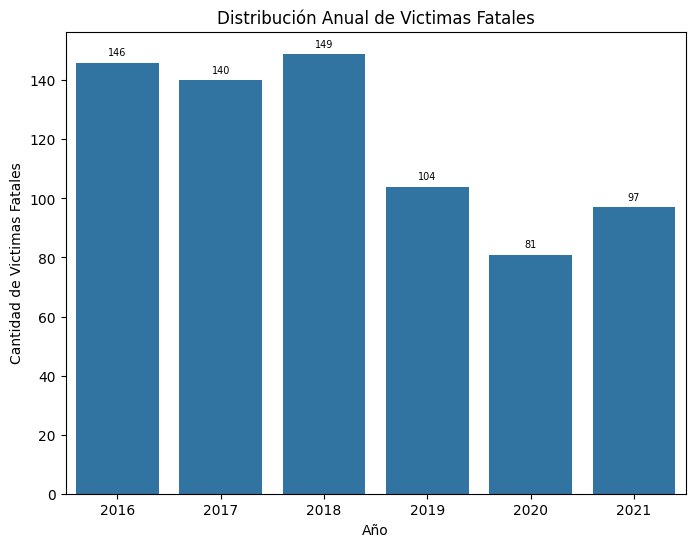

In [136]:
# establecer tamaño
plt.figure(figsize=(8, 6))

# Crea un gráfico de barras con la cantidad de homicidios por año, utilizando la paleta de colores 'viridis'
ax = sns.countplot(x=df_homicidios['AAAA'])

# Establece el título del gráfico
plt.title('Distribución Anual de Victimas Fatales')

# Establece la etiqueta del eje X
plt.xlabel('Año')

# Establece la etiqueta del eje Y
plt.ylabel('Cantidad de Victimas Fatales')

# Itera sobre las barras del gráfico para agregar la cantidad de accidentes sobre cada barra
for p in ax.patches:
    # Anota el valor de la altura de la barra (cantidad de accidentes) sobre ella
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2.0, p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=7)  # Ajusta el tamaño del texto aquí

# mostrar grafico
plt.show()

El grafico de barras para la variable AAAA (Año) nos muestra que fue la menor cantidad de siniestros viales en el año 2020 (esto debido a la pandemia), aunque hubo un descenso para el año 2019. Se manifestaba un patron de aumento hasta antes del inicio de la pandemia, tendencia que volvio a manifestarse para el año 2021

#### 512 Mes: MM -> CUALITATIVA

##### G. Barras -> univariado

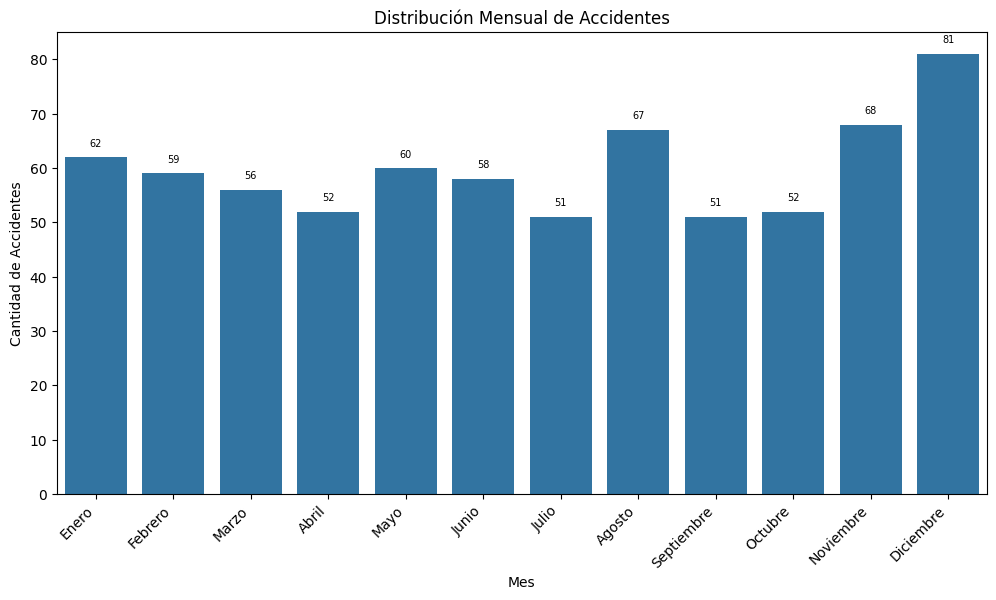

In [137]:
# Define un diccionario que asocia cada número de mes con su nombre correspondiente en español
meses = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
         7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}

# Usa el diccionario 'meses' para convertir los números de mes en nombres en la columna 'Mes' del DataFrame 'df_homicidios'
df_homicidios['MM'] = df_homicidios['MM'].map(meses)

# Establece el tamaño de la figura del gráfico a 12x6 pulgadas
plt.figure(figsize=(12, 6))

# Crea un gráfico de barras que cuenta la cantidad de registros por cada mes, usando la paleta de colores 'viridis'
ax = sns.countplot(x=df_homicidios['MM'])

# Rota las etiquetas del eje x en un ángulo de 45 grados para mejorar la legibilidad y alinea a la derecha
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Itera sobre las barras del gráfico para colocar una anotación con el total de registros encima de cada barra
for p in ax.patches:
    # Coloca una etiqueta con el número total de registros encima de cada barra, ajustando la posición y el tamaño del texto
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7)

# Asigna un título al gráfico, indicando que muestra la distribución mensual de accidentes
plt.title('Distribución Mensual de Accidentes')

# Etiqueta el eje x como 'Mes'
plt.xlabel('Mes')

# Etiqueta el eje y como 'Cantidad de Accidentes'
plt.ylabel('Cantidad de Accidentes')

# Muestra el gráfico
plt.show()


En este grafico de barras se puede observar que los meses que tienen una mayor cantidad de victimas fatales son diciembre, noviembre y agosto,siendo la mayor cantidad de victimas fatales en  diciembre. Y la menor cantidad de victimas fatales se dio en los meses de abril, julio, setiembre y octubre.

#### 513 Dia del Mes: DD -> CUALITATIVA

##### G. Barras -> univariado

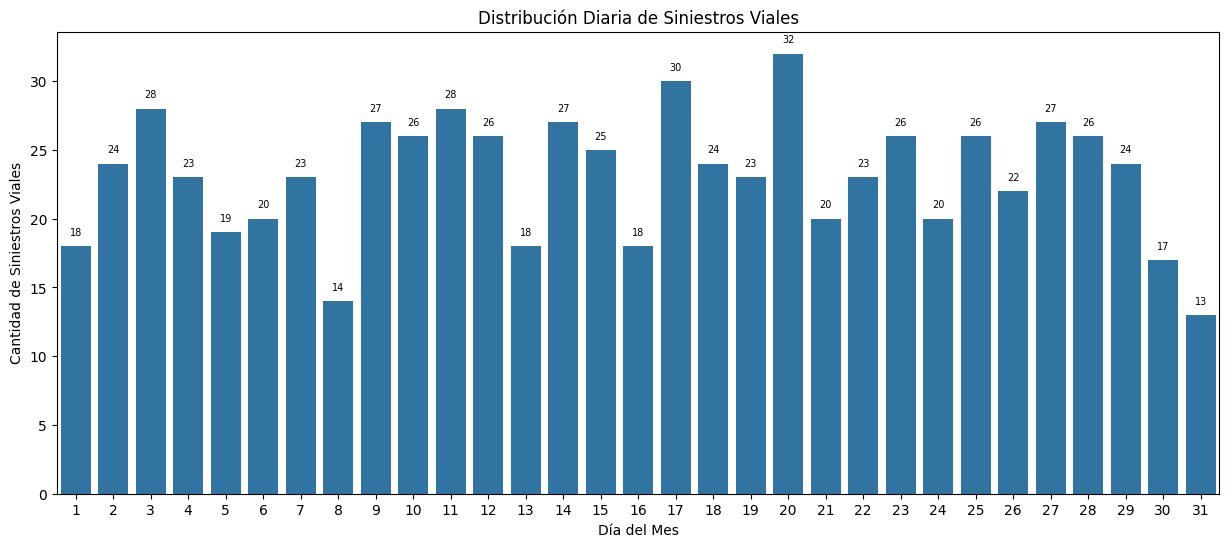

In [138]:
# Importa las bibliotecas necesarias para la visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el tamaño de la figura para el gráfico, con un ancho de 15 pulgadas y una altura de 6 pulgadas. Esto asegura que haya espacio suficiente para visualizar claramente todos los datos.
plt.figure(figsize=(15, 6))

# Utiliza seaborn para crear un gráfico de barras que cuenta el número de accidentes por cada día del mes. La columna 'Día' del DataFrame df_homicidios se usa como eje X. La paleta 'viridis' aplica un esquema de colores para las barras.
ax = sns.countplot(x=df_homicidios['DD'])

# Establece el título del gráfico para proporcionar un contexto claro sobre lo que se está visualizando.
plt.title('Distribución Diaria de Siniestros Viales')

# Etiqueta el eje X como 'Día del Mes' para indicar que las barras representan días específicos del mes.
plt.xlabel('Día del Mes')

# Etiqueta el eje Y como 'Cantidad de Accidentes' para mostrar que la altura de cada barra representa el número total de accidentes ocurridos en ese día específico.
plt.ylabel('Cantidad de Siniestros Viales')

# Itera sobre cada barra en el gráfico (cada "parche" representa una barra) para agregar una anotación con el total de accidentes.
for p in ax.patches:
    # La anotación se coloca justo encima de cada barra. str(int(p.get_height())) convierte la altura de la barra (el conteo de accidentes) a texto. La posición se calcula para centrar el texto en la parte superior de la barra.
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7)  # El texto se ajusta para que aparezca 10 puntos por encima de la barra.

# Muestra el gráfico. Este paso es necesario para visualizar el gráfico cuando se usa un entorno de programación que no lo hace automáticamente después de cada celda o bloque de código.
plt.show()


En este grafico de barras se observa una disminucion de la cantidad de siniestros viales para el fin de mes, los dias que tiene una mayor cantidad de siniestros viales son alrededor de los dias 15 al 20

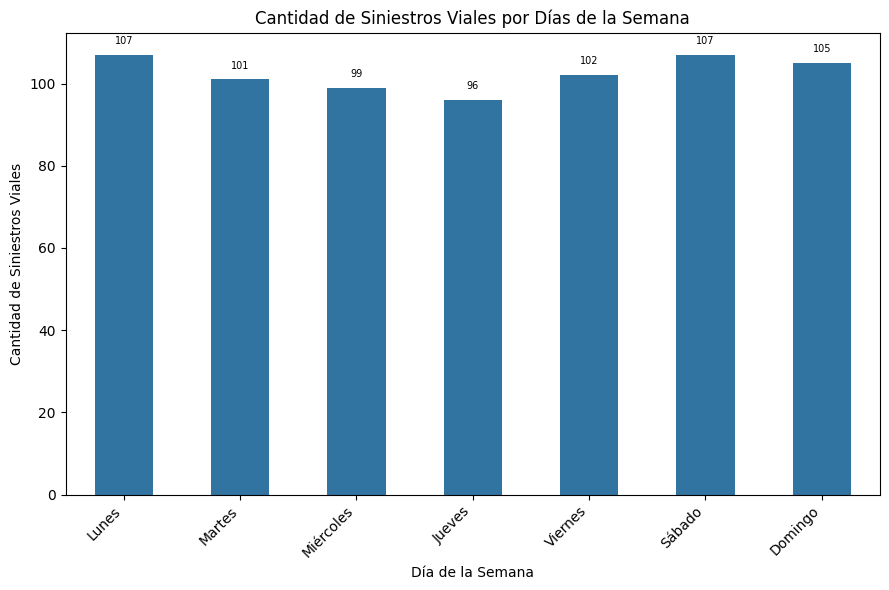

In [142]:
# Convertir la columna 'Fecha' a datetime si aún no lo está
df_homicidios['FECHA'] = pd.to_datetime(df_homicidios['FECHA'])

# Extraer el día de la semana en inglés
df_homicidios['Dia_de_la_Semana'] = df_homicidios['FECHA'].dt.day_name()

# Mapear los días de la semana del inglés al español
dias_en_espanol = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
df_homicidios['Dia_de_la_Semana'] = df_homicidios['Dia_de_la_Semana'].map(dias_en_espanol)

# Contar los homicidios por día de la semana
dias_semana_counts = df_homicidios['Dia_de_la_Semana'].value_counts()[list(dias_en_espanol.values())]

# Crear el gráfico
plt.figure(figsize=(9, 6))
ax = sns.barplot(x=dias_semana_counts.index, y=dias_semana_counts.values,width=0.5)
plt.title('Cantidad de Siniestros Viales por Días de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Siniestros Viales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Agregar el total en las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7)

plt.tight_layout()
plt.show()


En este grafico de barras se observa que de sabado a lunes hay la mayor cantidad de siniestros viales, siendo la menor cantidad de estos los dias jueves. 

#### 514 Franja Horaria: HH -> CUALITATIVA

##### G. Barras -> univariado

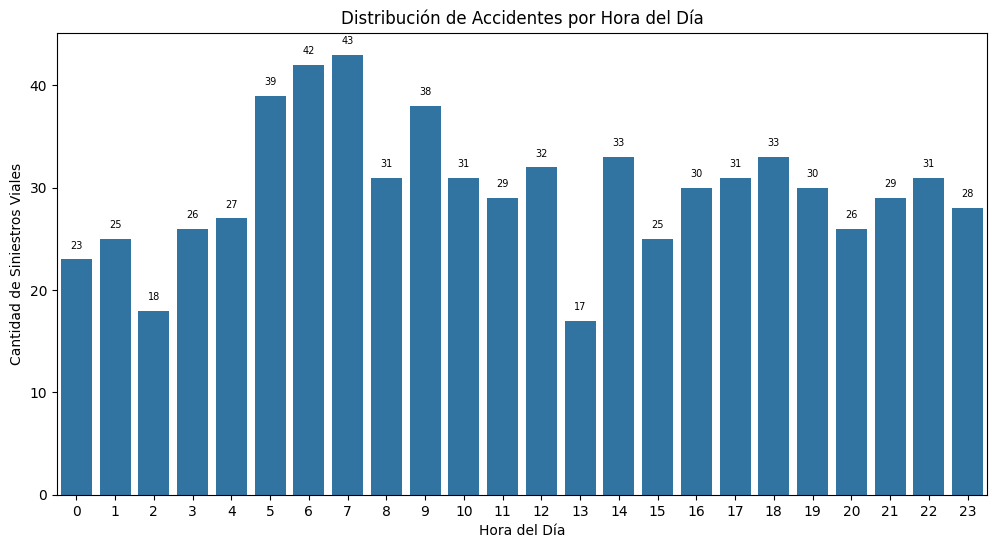

In [139]:
# Importa las bibliotecas necesarias para la visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el tamaño de la figura para el gráfico. Un ancho de 12 pulgadas y una altura de 6 pulgadas proporcionan suficiente espacio para una clara visualización de los datos.
plt.figure(figsize=(12, 6))

# Utiliza seaborn para crear un gráfico de barras que muestra el conteo de accidentes por cada hora del día. La columna 'Hora entera' del DataFrame 'df_homicidios' se usa como eje X. La paleta de colores 'viridis' se utiliza para las barras.
ax = sns.countplot(x=df_homicidios['HH'])

# Establece el título del gráfico, 'Distribución de Accidentes por Hora del Día', para proporcionar contexto sobre lo que se está mostrando.
plt.title('Distribución de Siniestros Viales por Hora del Día')

# Etiqueta el eje X como 'Hora del Día' para indicar que las barras representan diferentes horas del día.
plt.xlabel('Hora del Día')

# Etiqueta el eje Y como 'Cantidad de Accidentes' para mostrar que la altura de cada barra representa el número total de accidentes ocurridos en esa hora específica.
plt.ylabel('Cantidad de Siniestros Viales')

# Itera sobre cada barra (cada "parche") en el gráfico para agregar una anotación con el total de accidentes.
for p in ax.patches:
    # Coloca una anotación con el número total de accidentes (altura de la barra) encima de cada barra. La posición se centra en la barra, y el texto se ajusta para aparecer 10 puntos por encima de la cima de la barra.
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7)

# Muestra el gráfico, lo cual es necesario para visualizarlo en entornos que no lo hacen automáticamente.
plt.show()


En este grafico se observa que hay una franja horaria que resulta contener una gran cantidad de siniestros viales, y esta es entre las 5 horas y las 9 horas, con una tendencia ascendente hasta las 7 horas. Entre las 15 horas y las 18 horas, hay tambien una tendencia a aumentar la cantidad de siniestros viales. A las 2 horas y a las 13 horas, hay una reducida cantidad de siniestros viales. 

#### 515 Año: AAAA, Mes: MM -> CUALITATIVAS

##### G. Lineas -> univariado

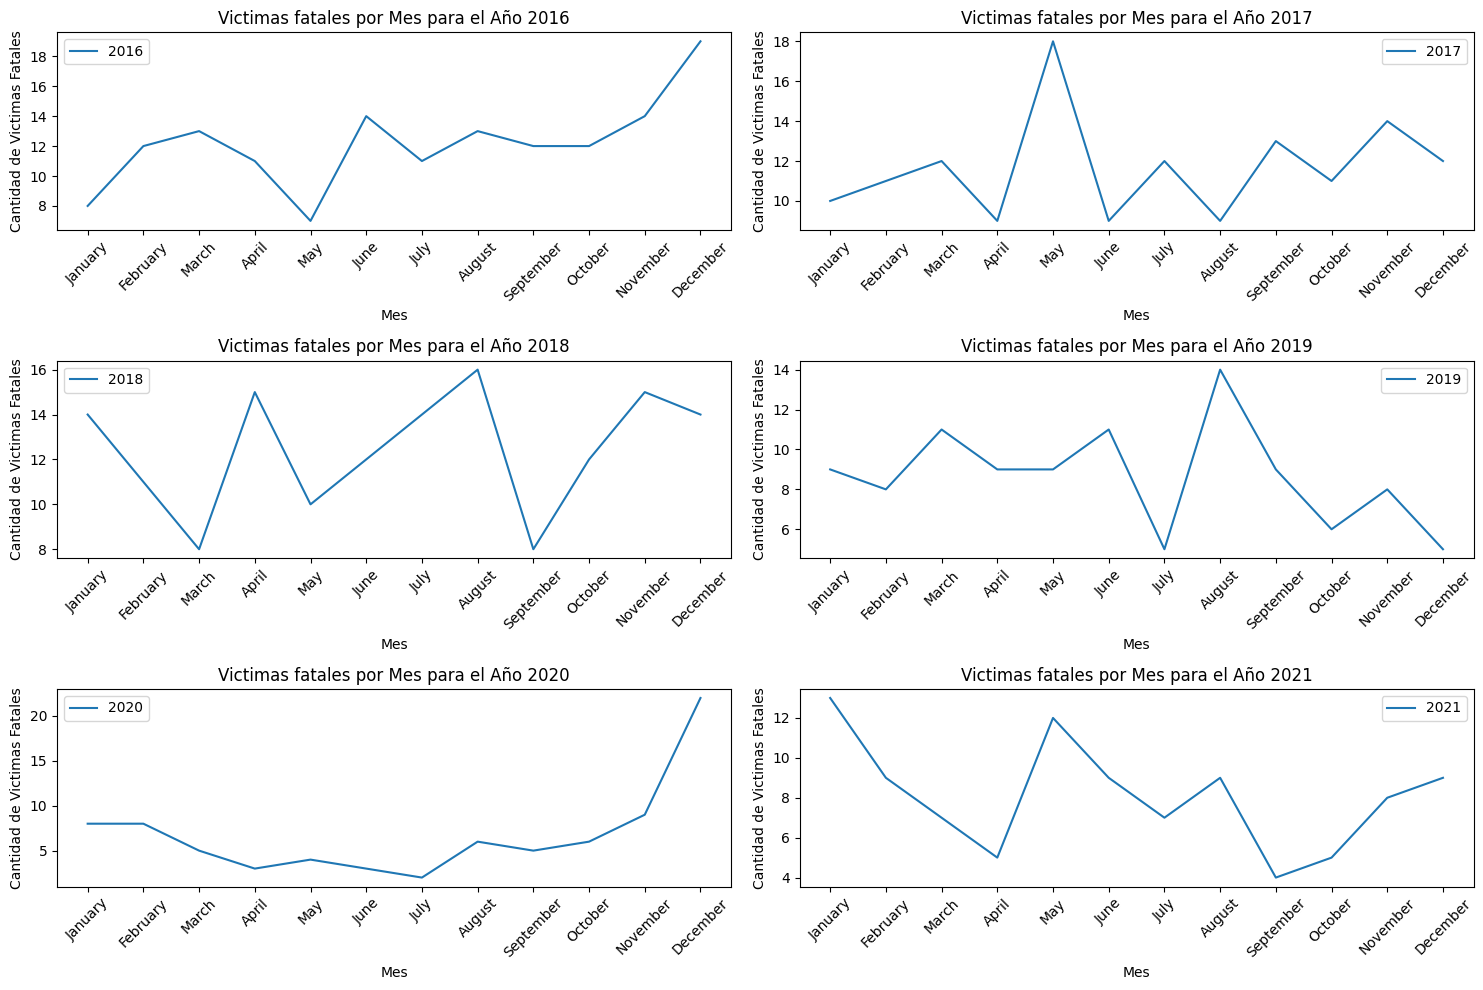

In [ ]:
# # Convertir la columna 'Fecha' a tipo datetime
# df_homicidios['Fecha'] = pd.to_datetime(df_homicidios['Fecha'])

# Crear columnas de 'Año' y 'Mes' como enteros
df_homicidios['AAAA'] = df_homicidios['FECHA'].dt.year
df_homicidios['MM'] = df_homicidios['FECHA'].dt.month

# # Configurar el estilo de seaborn para usar los colores de viridis
# sns.set_palette("viridis", n_colors=12)

# Obtener los años únicos presentes en la columna 'Año'
unique_years = df_homicidios['AAAA'].unique()

# Crear subgráficos en una matriz de 3x2
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Iterar sobre cada año
for i, year in enumerate(unique_years):
    # Calcular la posición en la matriz
    row = i // 2
    col = i % 2

    # Filtrar el DataFrame para el año actual
    df_year = df_homicidios[df_homicidios['AAAA'] == year]

    # Contar los homicidios por mes
    count_by_month = df_year.groupby('MM').size()

    # Crear el gráfico de líneas
    sns.lineplot(x=count_by_month.index.map(lambda x: calendar.month_name[x]), y=count_by_month.values, ax=axes[row, col], label=str(year))

    # Configurar etiquetas y título
    axes[row, col].set_title(f'Victimas fatales por Mes para el Año {year}')
    axes[row, col].set_ylabel('Cantidad de Victimas Fatales')

    # Rotar las etiquetas de los meses a 45 grados
    axes[row, col].tick_params(axis='x', rotation=45)

# Configurar etiquetas en el eje x 
axes[-1, 0].set_xlabel('Mes')
axes[-1, 1].set_xlabel('Mes')
axes[-2, 0].set_xlabel('Mes')
axes[-2, 1].set_xlabel('Mes')
axes[-3, 0].set_xlabel('Mes')
axes[-3, 1].set_xlabel('Mes')
# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


El grafico de lineas nos puede ayudar para ver la posible tendencia a lo largo de los meses. Aunque este nos muestra que los meses de mayor cantidad de victimas fatales durante los años 2016 a 2021, no han sido los mismos. Lo mismo ocurre para los de menor cantidad de victimas fatales. Y la unica tendencia a no subir se dio durante la pandemia en el año 2020, en el que no fueron tan marcados los puntos de inflexion.

### 52 ESPACIO COMO REFERENCIA

#### 521 Mapa de calor

In [187]:
import folium
from folium.plugins import HeatMap

# Crear un mapa centrado en Buenos Aires
mapa_buenos_aires = folium.Map(location=[-34.6037, -58.3816], zoom_start=12.5)

# Agregar marcadores al mapa para cada accidente
for index, row in df_homicidios.iterrows():
    info = f"""
    Accidente:{row['ID']}
    Fecha:{row['FECHA']}
    Edad:{row['EDAD']}
    """
    folium.Marker([row['pos y'], row['pos x']],
                  popup=folium.Popup(html=info, parse_html=True),
                  icon=folium.Icon(color='red', icon='warning', prefix='fa')).add_to(mapa_buenos_aires)

# Mostrar el mapa en el cuaderno
mapa_buenos_aires


#### 522 Mapa de la ubicacion de los accidentes

In [188]:
# Inicializa un objeto Map de Folium centrado en Buenos Aires, Argentina, con un nivel de zoom inicial de 12.5 para una vista detallada de la ciudad.
mapa_buenos_aires = folium.Map(location=[-34.6037, -58.3816], zoom_start=12.5)

# Itera sobre cada fila del DataFrame 'df_homicidios' para agregar marcadores al mapa.
for index, row in df_homicidios.iterrows():
    # Prepara el contenido que se mostrará en el popup del marcador, incluyendo el ID del accidente, la fecha y la edad involucrada.
    info = f"""
    Siniestro Vial:{row['ID']}
    Fecha:{row['FECHA']}
    Edad:{row['EDAD']}
    """
    # Crea un marcador en la ubicación especificada por las columnas 'Pos y' y 'Pos x' de la fila actual.
    # Configura un popup con la información del accidente y un icono rojo de advertencia.
    folium.Marker([row['pos y'], row['pos x']],
                  popup=folium.Popup(html=info, parse_html=True),
                  icon=folium.Icon(color='red', icon='warning', prefix='fa')).add_to(mapa_buenos_aires)

# Muestra el mapa generado en el cuaderno de Jupyter. Al ejecutar esta celda en un cuaderno, se renderizará el mapa interactivo.
mapa_buenos_aires



En este código, estamos creando una visualización interactiva usando la biblioteca Folium en Python, específicamente un mapa de Buenos Aires, Argentina, que muestra la ubicación de todos los accidentes. Cada accidente se marca en el mapa, proporcionando detalles como el ID del accidente, la fecha y la edad de la persona involucrada. Este tipo de visualización es extremadamente útil para análisis geográficos y estudios urbanos, permitiendo a los analistas, planificadores urbanos, y responsables de la toma de decisiones ver patrones espaciales de incidentes, identificar puntos críticos de alta incidencia, y potencialmente guiar la asignación de recursos o el diseño de intervenciones de seguridad vial.

#### 523 Tipo de Calle:TIPO_DE_CALLE(CUALITATIVA), Cruce:Cruce(CUALITATIVA)

##### G. Columna -> univariado

Los Graficos de Columnas son una herramienta versátil que se utiliza para visualizar datos de manera efectiva, comparar valores, identificar tendencias y patrones, y facilitar la toma de decisiones.

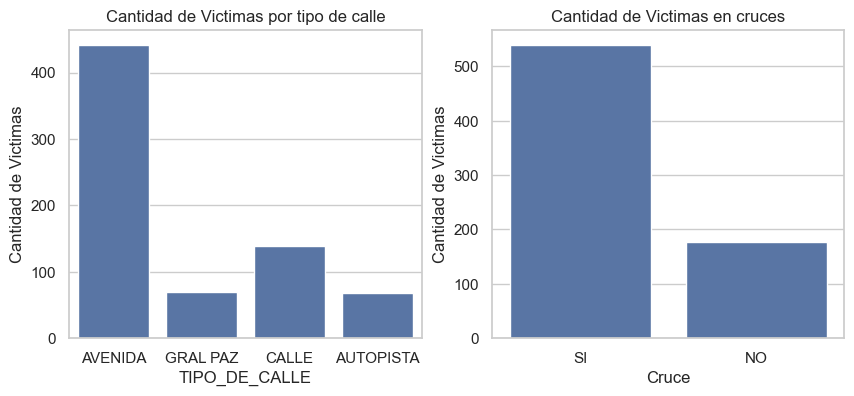

In [168]:
# Prepara la figura y los ejes para dos subgráficos, con un tamaño total de 10x4 pulgadas.
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Crea el primer gráfico de barras en el primer eje (axes[0]), mostrando la cantidad de víctimas por tipo de calle.
# Se especifica el DataFrame `df`, la columna 'Tipo de calle' como variable en el eje x, y se asigna este gráfico al primer eje.
sns.countplot(data=df_homicidios, x='TIPO_DE_CALLE', ax=axes[0])

# Configura el título y la etiqueta del eje y para el primer gráfico, mejorando la claridad y la interpretación del gráfico.
axes[0].set_title('Cantidad de Victimas por tipo de calle')
axes[0].set_ylabel('Cantidad de Victimas')

# Crea el segundo gráfico de barras en el segundo eje (axes[1]), mostrando la cantidad de víctimas en cruces.
# Al igual que el primer gráfico, se asigna a la variable 'Cruce' en el eje x y se visualiza en el segundo eje.
sns.countplot(data=df_homicidios, x='Cruce', ax=axes[1])

# Configura el título y la etiqueta del eje y para el segundo gráfico, siguiendo el mismo propósito de claridad y facilitación de interpretación.
axes[1].set_title('Cantidad de Victimas en cruces')
axes[1].set_ylabel('Cantidad de Victimas')

# Muestra los gráficos configurados, permitiendo la visualización de los datos analizados.
plt.show()


Los Graficos de Columnas muestran que las avenidas y cruces de calles, son los lugares donde ocurren la mayor cantidad de víctimas fatales de siniestros viales. Esto indica que las intersecciones en las avenidas presentan riesgos para la seguridad vial, posiblemente se deba al alto flujo de vehículos, la mezcla de distintos tipos de tráfico (como peatones, bicicletas y vehículos motorizados), y la complejidad de las señalizaciones y normas de tránsito. 

### 53 CARACTERISTICAS DE PERSONA COMO REFERENCIA

#### 531 Edad: EDAD -> CUANTITATIVA

##### Histograma -> univariado

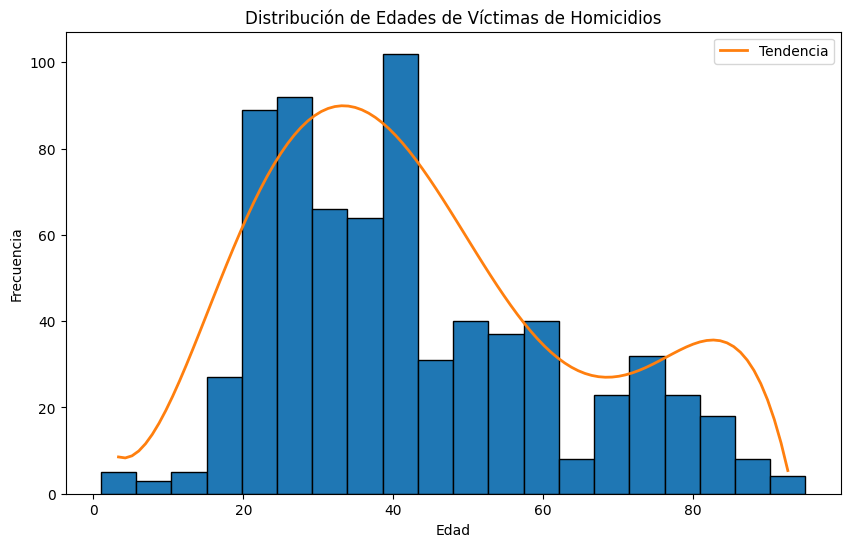

In [156]:
# Convierte la columna 'Edad' a numérica, tratando los errores con 'coerce' para convertir valores no numéricos en NaN.
df_homicidios['EDAD'] = pd.to_numeric(df_homicidios['EDAD'], errors='coerce')

# Elimina las filas donde la edad es NaN, asegurando que solo se trabaje con datos completos para el análisis.
df_homicidios = df_homicidios.dropna(subset=['EDAD'])

# Configura el tamaño de la figura para el histograma y crea el histograma con 20 barras, añadiendo bordes negros para una mejor definición visual de cada barra.
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df_homicidios['EDAD'], bins=20, edgecolor='black')

bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Calcula el centro de cada barra para asignar colores.

# Ajusta y dibuja una curva de tendencia sobre el histograma. Se utiliza un polinomio de grado 5 para ajustar los centros de las barras y sus alturas.
x_vals = np.linspace(min(bin_centers), max(bin_centers), 100)
coefficients = np.polyfit(bin_centers, n, 5)  # Ajusta un polinomio de grado 5.
y_vals = np.polyval(coefficients, x_vals)  # Evalúa el polinomio ajustado.

# Dibuja la línea de tendencia sobre el histograma, ajustando la posición en el eje Y para mejorar la visualización.
plt.plot(x_vals, y_vals + 10, linestyle='-', linewidth=2, label='Tendencia')

# Configura las etiquetas de los ejes y el título del gráfico para proporcionar contexto.
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades de Víctimas de Homicidios')

# Añade una leyenda para explicar los elementos del gráfico.
plt.legend()

# Muestra el gráfico resultante.
plt.show()


El histograma nos muestra que la distribucion esta sesgada positivamente y que la mayor cantidad de siniestros viales han ocurrido a victimas fatales entre los 20 años y un poco mas de 40 años. Tambien que la menor cantidad de victimas fatales en edad adulta se ubica alrededor de los 65 años.

#### 532 Edad:EDAD(CUANTITATIVA), Año:AAAA(CUALITATIVA) 


##### G. Boxplot -> bivariado

El Grafico Boxplot es una herramienta estadística que resume cinco estadísticas descriptivas (mínimo, primer cuartil, mediana, tercer cuartil y máximo) y proporciona una representación visual rápida de la distribución de los datos, lo que facilita comparaciones entre grupos.

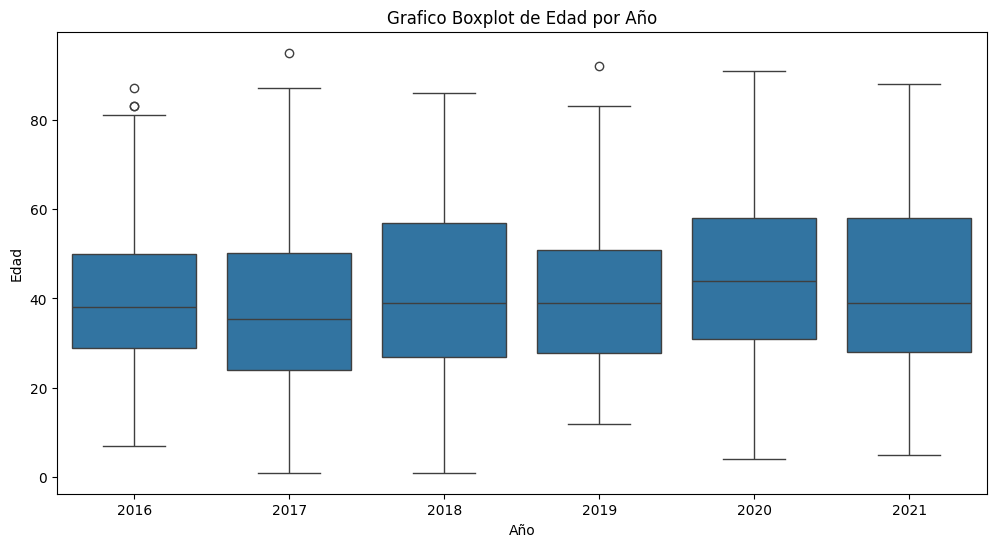

In [157]:
# Configura el tamaño de la figura del gráfico para asegurar que el boxplot sea claramente visible y fácil de interpretar.
plt.figure(figsize=(12, 6))

# Crea un boxplot usando seaborn, que representa la distribución de las edades de las víctimas de homicidios para cada año disponible en el DataFrame 'df_homicidios'.
# 'x' define la variable categórica (Año), 'y' la variable numérica (Edad), y 'data' especifica el DataFrame de origen.
# La paleta 'viridis' se utiliza para colorear los boxplots, mejorando la estética y la legibilidad del gráfico.
sns.boxplot(x='AAAA', y='EDAD', data=df_homicidios)

# Establece el título del gráfico para proporcionar un contexto claro sobre lo que se está analizando.
plt.title('Grafico Boxplot de Edad por Año')

# Etiqueta el eje X como 'Año' para identificar claramente las categorías que representan los diferentes años en el gráfico.
plt.xlabel('Año')

# Etiqueta el eje Y como 'Edad' para indicar que las medidas en el gráfico se refieren a las edades de las víctimas de homicidios.
plt.ylabel('Edad')

# Muestra el gráfico. Esta función es necesaria para visualizar el boxplot en notebooks de Jupyter o en entornos de desarrollo de Python que no renderizan automáticamente la figura.
plt.show()


El Grafico Boxplot muestra que la mediana se ubica alrededor de los 40 años de edad de las victimas fatales para cada año. El año 2019 tuvo un mayor grado de agrupacion. Para los años 2016, 2017 y 2019 se encontraron algunos valores atipicos para personas mayores a 80 años. El año 2021 tuvo un mayor grado de dispersion debido a su rango intercuartilico

#### 533 Sexo:SEXO(CUALITATIVA), Año:AAAA(CUALITATIVA) 


##### G. Barras Agrupado -> bivariado


El Grafico de Barras Agrupado es una herramienta visual utilizada para comparar múltiples grupos en una sola visualización. Se utiliza cuando se quiere analizar y comparar las relaciones entre dos variables categóricas, mientras se mantiene la distinción entre las categorías de ambas variables.

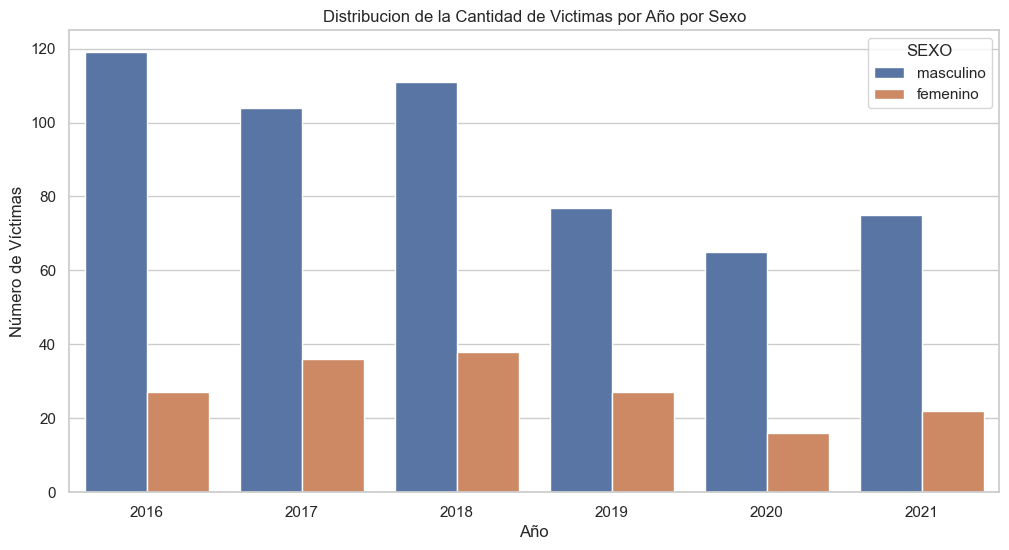

In [162]:
# Convierte todos los valores en la columna 'Sexo' a minúsculas para asegurar la consistencia de los datos, facilitando la agrupación y comparación.
df_homicidios['SEXO'] = df_homicidios['SEXO'].str.lower()

# Establece un estilo de fondo para los gráficos generados con Seaborn, mejorando la estética visual.
sns.set(style="whitegrid")

# Configura el tamaño de la figura para el gráfico a 12 pulgadas de ancho por 6 pulgadas de alto, asegurando que el gráfico sea lo suficientemente grande para una lectura clara.
plt.figure(figsize=(12, 6))

# # Establece la paleta de colores 'viridis' para todos los gráficos generados por Seaborn, proporcionando una gama de colores coherente y visualmente agradable.
# sns.set_palette("viridis")

# Crea el gráfico de barras utilizando la función countplot de Seaborn, agrupando los datos por 'Año' y diferenciando las barras por 'Sexo'.
ax = sns.countplot(x='AAAA', hue='SEXO', data=df_homicidios)

# Configura las etiquetas del eje X como 'Año' y del eje Y como 'Número de Víctimas', clarificando lo que representa cada eje.
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de Victimas Fatales')

# Establece el título del gráfico como 'Distribución de Víctimas por Género cada Año', proporcionando un contexto inmediato sobre el propósito del gráfico.
ax.set_title('Distribucion de la Cantidad de Victimas por Sexo cada Año')

# Finalmente, muestra el gráfico generado. Esta función es esencial para visualizar el gráfico en entornos como notebooks de Jupyter.
plt.show()


Este Grafico de Barras Agrupado separa los datos según el género para cada año. Se observa que siempre es mayor la cantidad de victimas de sexo masculino que las de sexo femenino, en los dos ultimos años dos veces mayor que la del sexo femenino.

#### 534 Edad:EDAD(CUANTITATIVA), Sexo:SEXO(CUALITATIVA), Año:AAAA(CUALITATIVA) 


##### G. Barras Agrupado 

El gráfico de barras agrupado de tres variables, donde dos son variables categóricas y una es numérica, es una herramienta valiosa para visualizar y comparar cómo una variable numérica varía entre diferentes grupos definidos por las otras dos variables categóricas

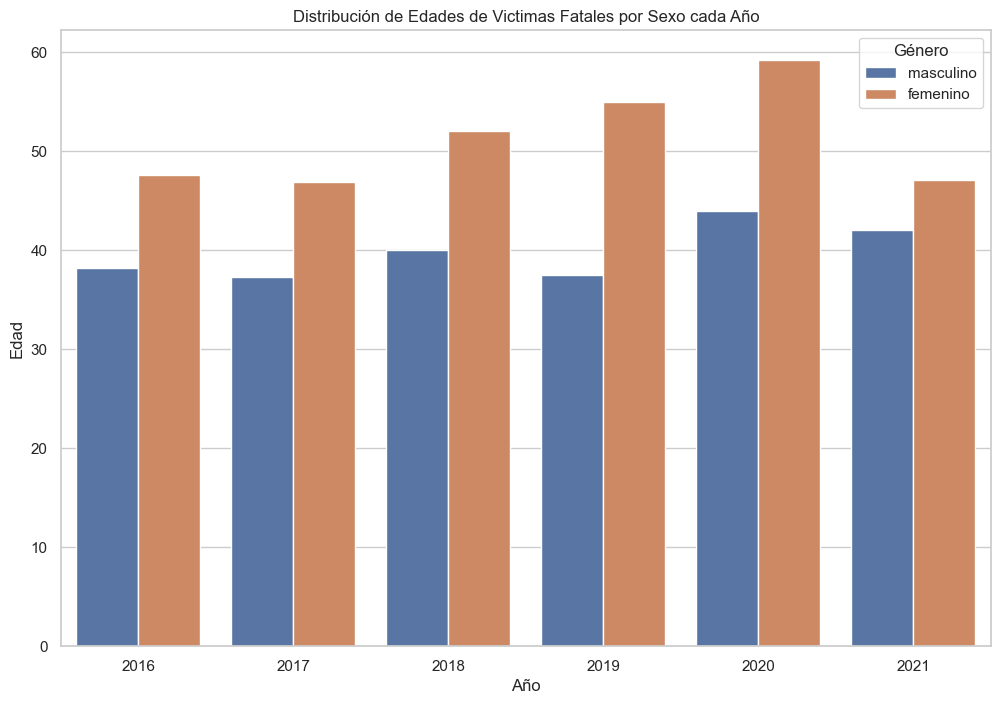

In [164]:
# Configura el estilo del gráfico con un fondo de cuadrícula blanca, lo que mejora la legibilidad del gráfico.
sns.set(style="whitegrid")

# Establece el tamaño de la figura del gráfico a 12 pulgadas de ancho por 8 pulgadas de alto para asegurar que los detalles sean claramente visibles.
plt.figure(figsize=(12, 8))

# Crea un gráfico de barras que muestra la edad promedio de las víctimas por año, diferenciada por género.
# La opción 'ci=None' omite las barras de error para una visualización más limpia.
ax = sns.barplot(x='AAAA', y='EDAD', hue='SEXO', data=df_homicidios, ci=None)

# Establece las etiquetas de los ejes X e Y para claridad, indicando que el gráfico muestra la distribución de las edades por año y por género.
ax.set_xlabel('Año')
ax.set_ylabel('Edad')

# Añade un título al gráfico, proporcionando un contexto inmediato sobre el contenido del análisis visual.
ax.set_title('Distribución de Edades de Victimas Fatales por Sexo cada Año')

# Ajusta la leyenda del gráfico para incluir un título ('Género') y mover su posición a la esquina superior derecha, facilitando la interpretación del gráfico sin obstruir los datos.
ax.legend(title='Género', loc='upper right')

# Muestra el gráfico. Este paso es esencial para que el gráfico sea visible en el entorno de ejecución, como un cuaderno Jupyter.
plt.show()


El Grafico de Barras Agrupado muestra que hasta el 2020 había una tendencia creciente en la edad promedio de la victimas se sexo femenino a lo largo de los años, pero disminuyo para el año 2021. En las victimas de sexo masculino, la edad promedio se mantiene alrededor de los 40 años, pero siempre menor que la victimas de sexo femenino.

#### 535 Vehiculo de quien resulto acusado:ACUSADO(CUALITATIVA) 

##### G. Columna -> univariado

Los Graficos de Columnas son una herramienta versátil que se utiliza para visualizar datos de manera efectiva, comparar valores, identificar tendencias y patrones, y facilitar la toma de decisiones.

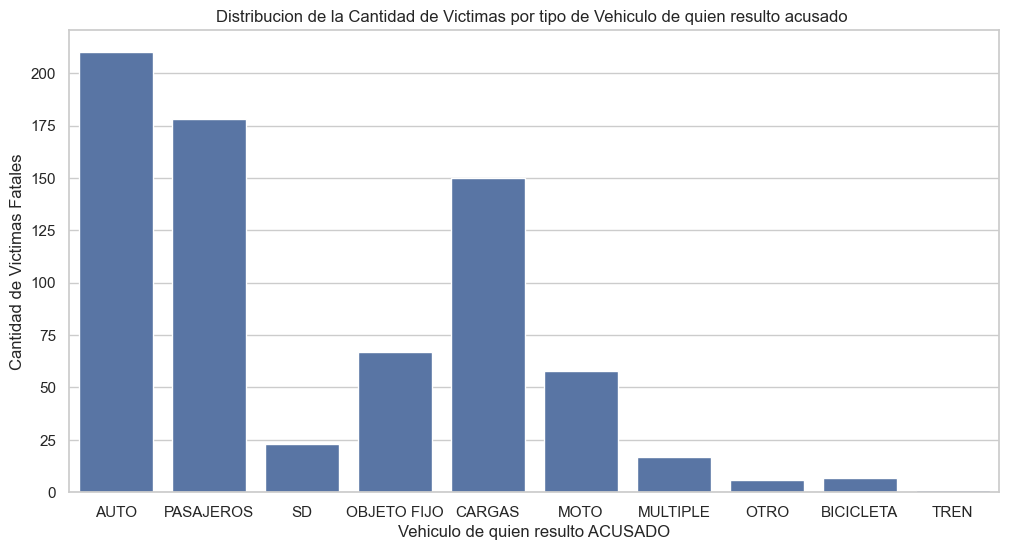

In [ ]:
# Establece un estilo de fondo para los gráficos generados con Seaborn, mejorando la estética visual.
sns.set(style="whitegrid")

# Configura el tamaño de la figura para el gráfico a 12 pulgadas de ancho por 6 pulgadas de alto, asegurando que el gráfico sea lo suficientemente grande para una lectura clara.
plt.figure(figsize=(12, 6))

# Crea el gráfico de barras utilizando la función countplot de Seaborn, agrupando los datos por 'ACUSADO' 
ax = sns.countplot(x='ACUSADO', data=df_homicidios)

# Configura las etiquetas del eje X y del eje Y.
ax.set_xlabel('Vehiculo de quien resulto ACUSADO')
ax.set_ylabel('Cantidad de Victimas Fatales')

# Establece el título del gráfico 
ax.set_title('Distribucion de la Cantidad de Victimas por tipo de Vehiculo de quien resulto acusado ')

# Finalmente, muestra el gráfico generado. Esta función es esencial para visualizar el gráfico en entornos como notebooks de Jupyter.
plt.show()


Este Grafico de Columnas muestra que los conductores de autos son los mayormente acusados en los siniestros viales, seguidos por los pasjeros, y posteriormente, por los vehículos de carga. Son entonces los conductores de autos y los pasajeros, los acusados con mayor frecuencia que el resto, lo cual podría sugerir áreas de interés para investigaciones adicionales o para la toma de decisiones en el ámbito legal o de seguridad pública

#### 536 Edad:EDAD(CUANTITATIVA), Vehiculo de Victima:VICTIMA(CUALITATIVA)

##### G. Boxplot -> bivariado

El Grafico Boxplot es una herramienta estadística que resume cinco estadísticas descriptivas (mínimo, primer cuartil, mediana, tercer cuartil y máximo) y proporciona una representación visual rápida de la distribución de los datos, lo que facilita comparaciones entre grupos.

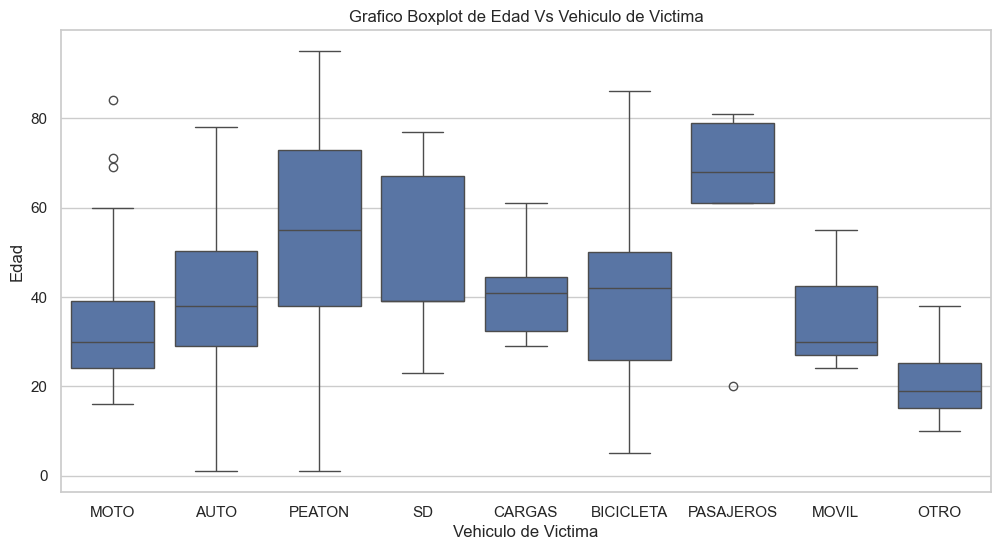

In [185]:
# Configura el tamaño de la figura del gráfico para asegurar que el boxplot sea claramente visible y fácil de interpretar.
plt.figure(figsize=(12, 6))

# Crea un boxplot
sns.boxplot(x='VICTIMA', y='EDAD', data=df_homicidios)

# Establece el título del gráfico para proporcionar un contexto claro sobre lo que se está analizando.
plt.title('Grafico Boxplot de Edad Vs Vehiculo de Victima')

# Etiqueta el eje X como 'Año' para identificar claramente las categorías que representan los diferentes años en el gráfico.
plt.xlabel('Vehiculo de Victima')

# Etiqueta el eje Y como 'Edad' para indicar que las medidas en el gráfico se refieren a las edades de las víctimas de homicidios.
plt.ylabel('Edad')

# Muestra el gráfico. Esta función es necesaria para visualizar el boxplot en notebooks de Jupyter o en entornos de desarrollo de Python que no renderizan automáticamente la figura.
plt.show()


El Grafico Boxplot muestra que las victimas fatales de tipo peaton tienen un valor representativo de alrededor de los 55 años, con un alto grado de dispersion debido al rango intercuartilico. Son las victimas cuyo vehiculo es del tipo cargas quienes tienen una menor dispersion, esto debido al menor tamaño del rango intercuartilico; y ademas, esta distribucion se encuentra sesgada positivamente.

#### 537 Edad:EDAD(CUANTITATIVA), Rol:ROL(CUALITATIVA)

##### G. Boxplot -> bivariado

El Grafico Boxplot es una herramienta estadística que resume cinco estadísticas descriptivas (mínimo, primer cuartil, mediana, tercer cuartil y máximo) y proporciona una representación visual rápida de la distribución de los datos, lo que facilita comparaciones entre grupos.

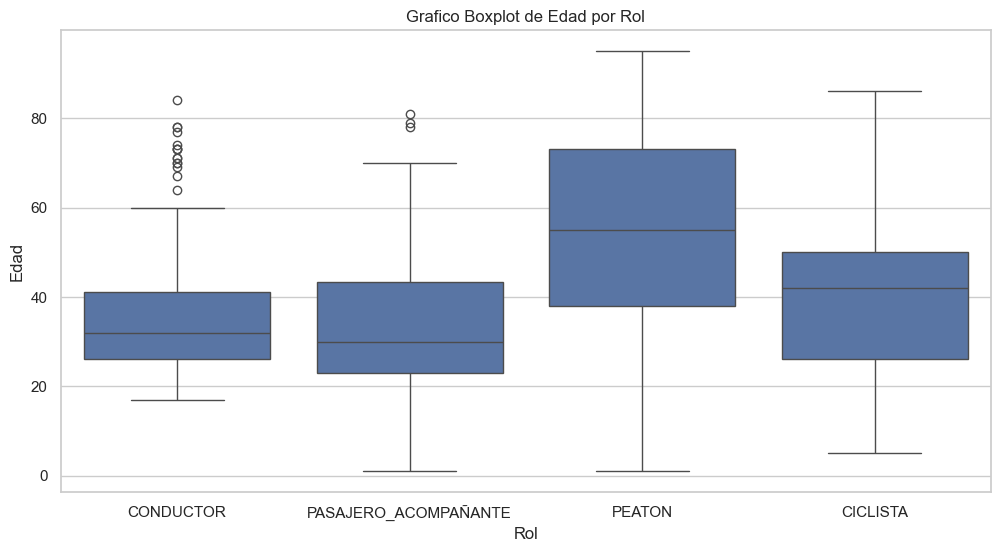

In [184]:
# Configura el tamaño de la figura del gráfico para asegurar que el boxplot sea claramente visible y fácil de interpretar.
plt.figure(figsize=(12, 6))

# Crea un boxplot
sns.boxplot(x='ROL', y='EDAD', data=df_homicidios)

# Establece el título del gráfico para proporcionar un contexto claro sobre lo que se está analizando.
plt.title('Grafico Boxplot de Edad Vs Rol')

# Etiqueta el eje X como 'Año' para identificar claramente las categorías que representan los diferentes años en el gráfico.
plt.xlabel('Rol')

# Etiqueta el eje Y como 'Edad' para indicar que las medidas en el gráfico se refieren a las edades de las víctimas de homicidios.
plt.ylabel('Edad')

# Muestra el gráfico. Esta función es necesaria para visualizar el boxplot en notebooks de Jupyter o en entornos de desarrollo de Python que no renderizan automáticamente la figura.
plt.show()


Los Graficos Boxplot muestran que los conductores y los pasajeros-acompañantes tienen edades respresentativas similares de alrededor de los 35 años y ambos son los que presentan outliers. Los conductores tienen una distribucion de la edad mas agrupada. Las edades de los peatones se hallan con mayor dispersion y ligeramente sesgada negativamente, es debido a que hay niños. El valor por debajo del cual estan el 75 % de los ciclistas es 50 años

### 54 TRATAMIENTO DE VALORES NULOS Y OUTLIERS

#### 541 TRATAMIENTO DE OUTLIERS

En el caso anterior existe la posibilidad de que los outliers sean valores no erroneos, porque existen conductores mayores de 60 años; asi como pasajeros mayores de 70 años. Por lo que se decide no hacer nada con los outliers.

#### 542 TRATAMIENTO DE VALORES NULOS Y DUPLICADOS

En el apartado B) PROCESO ETL, se trataron los valores nulos y duplicados.

## 6 GENERAR INFORMACION RELEVANTE

Se concluye a partir del análisis de los datos:

Que hay una franja horaria que resulta contener una gran cantidad de siniestros viales, y esta es, entre las 5 horas y las 9 horas, con una tendencia ascendente hasta las 7 horas. Entre las 15 horas y las 18 horas, hay también una tendencia a aumentar la cantidad de siniestros viales.

Hay una tendencia al aumento en la cantidad de siniestros, en el mes de diciembre; y también, se vio una disminucion en la cantidad de estos durante la pandemia.

Las víctimas son en su mayoría de sexo masculino, y el rol que desempeñaban era el de conductores de motocicletas o peatones. La mayor cantidad de siniestros viales han ocurrido con víctimas entre los 20 años y un poco más de 40 años. También que la menor cantidad de victimas en edad adulta se ubica alrededor de los 65 años.

Los acusados son en su mayoría conductores de auto, pasajeros y cargas.

En cuanto al lugar donde se producen los siniestros; los crucen son los lugares donde ocurren la mayor cantidad de siniestros viales. Y las Avenidas, a lo largo de los años, han sido los espacios de mayor cantidad de ocurrencia de siniestros. 

Por lo tanto, es requerida una mejora en el control de la seguridad vial de las Avenidas; se sugiere la realizacion de campañas dirigidas a conductores de autos y motocicletas; y también, a pasajeros. En especial a quienes se encuentren en el rango etario de 20 a 40 años de sexo masculino. Se recomienda, además, que se siga promoviendo la obtención de datos de siniestros viales para mejorar los estudios de estos.